# Analyzing Car CO₂ Emissions



## Background:
You work for a government agency that needs to renew its vehicle fleet. To be compliant, the agency needs to hit a specific carbon target. Your task is to analyze the emissions data of various car models to ensure compliance with environmental regulations. Your insights will help guide the selection of the most suitable, greener vehicles.

You will be working with data compiled from the [🔗Government of Canada official site](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64), which contains vehicle specifications, fuel consumption data, and CO₂ emissions information of cars. You can find the CSV file [🔗at this link](https://drive.google.com/file/d/1rKUfXonE7jFckQ5-gnQyDcJuTfm52lYJ/view?usp=sharing).

The available features are:

- `Model year`: Year the car model was marketed.
- `Make`: Company of the vehicle.
- `Model`: Car model.
- `Vehicle Class`: Class of vehicle depending on their utility, capacity, and weight.
- `Engine Size`: Size of the engine used in liters.
- `Cylinders`: Number of cylinders.
- `Transmission`: Transmission type with the number of gears (A = Automatic, AM = Automated manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = Number of gears).
- `Fuel Type`: Type of fuel used (X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = Natural gas).
- `City`: Fuel consumption on city roads (L/100 km).
- `Highway`: Fuel consumption on highways (L/100 km).
- `Combined`: The combined fuel consumption (55% city, 45% highway) shown in L/100 km.
- `Combined (mpg)`: The combined fuel consumption in both city and highway shown in miles per gallon (mpg).
- `CO₂ Emissions`: The tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving.


## Table of Contents
- [Step 1: Importing libraries](#step-1)
- [Step 2: Load the data](#step-2)
- [Step 3: CO₂ emissions](#step-3)
    - [CO₂ emissions distribution](#CO₂-distribution)
    - [Mean CO₂ emissions](#mean-CO₂-emissions)
        - [Exercise 1: Confidence interval](#ex1)
    - [Compact vs. Mid-size cars](#compact-vs-mid-size-cars)
        - [Exercise 2: Hypothesis testing](#ex2)
- [Step 4: Modelling the CO₂ emissions (1 variable)](#step-4)
    - [Dependent and independent features](#dependent-and-independent-features)
        - [Exercise 3: Correlation between numeric features and CO₂ emissions](#ex3)
    - [Fitting a Simple Linear Regression](#fitting-a-simple-linear-regression)
        - [Exercise 4: Simple Linear Regression](#ex4)
        - [Exercise 5: Plotting the line of best fit](#ex5)
- [Step 5: Modelling the CO₂ emissions (multiple variables)](#step-5)
    - [Categorical variables](#categorical-variables)
        - [Exercise 6: Encoding categorical variables](#ex6)
    - [Training the model](#training-the-model)
        - [Exercise 7: Create and fit a multiple linear regression](#ex7)
    - [Refining your predictors](#refining-your-predictors)
        - [Exercise 8: Removing features and retraining](#ex8)
    - [Predicting CO₂ emissions](#predicting-co2-emissions)
        - [Exercise 9: Predicting CO₂ emissions](#ex9)
    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import math

In [2]:
#Load the data
cars = pd.read_csv("data/00_data_analysis/co2_emissions.csv")
cars.head()

,Model year,Make,Model,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,City,Highway,Combined,Combined (mpg),CO2 emissions
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199
1,2020,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254
2,2020,Acura,MDX SH-AWD A-SPEC,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258
3,2020,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
4,2020,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261



## Mean CO₂ emissions 
To understand car emissions better, you first want a clear picture of the average CO₂ emissions. Confidence intervals and hypothesis tests can help with that. 


Text(0.5, 1.0, 'Distribution for CO₂ emissions')

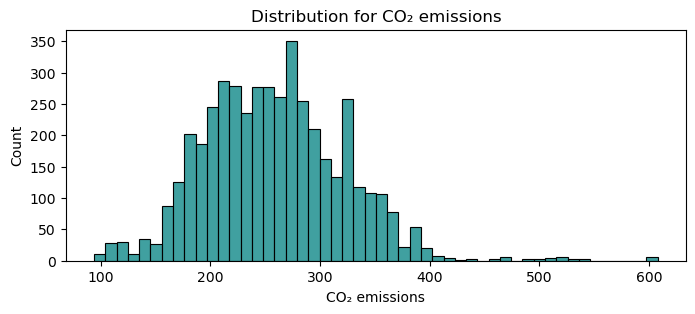

In [3]:
plt.figure(figsize=(8,3))
sns.histplot(cars, x="CO2 emissions", color="teal")
plt.xlabel("CO₂ emissions")
plt.title("Distribution for CO₂ emissions")

In [4]:
# GRADED CELL: exercise 1

### START CODE HERE ###

# find the sample mean
mean_emissions = cars["CO2 emissions"].mean()

# find the sample standard deviation
std_emissions = cars["CO2 emissions"].std()

# find the sample size
n = cars["CO2 emissions"].count()

# build the margin of error
margin_of_error = 1.96 * std_emissions / math.sqrt(n)

# build the lower and upper bounds of the confidence interval
lower_bound = mean_emissions - margin_of_error
upper_bound = mean_emissions + margin_of_error

### END CODE HERE ###

In [5]:
# print the results
print("The 95% confidence interval for the CO₂ emissions is (",round(lower_bound,2),
      ",", round(upper_bound,2),")")

The 95% confidence interval for the CO₂ emissions is ( 256.53 , 260.26 )


<a id="compact-vs-mid-size-cars"></a>

### Compact vs. Mid-size cars



#### Exercise 2: Hypothesis Testing

When deciding which vehicle class better fits the necessities of the agency, compact and mid-size cars are among the top contenders due to their balance of size and efficiency. If the CO₂ emissions are not significantly different, mid-size cars might be a bit more comfortable due to extra space. Conduct a hypothesis test at the 5% significance level to see if the mean CO₂ emissions of compact cars differ from those of mid-size cars.



In [6]:
cars["Vehicle class"].unique()

array(['Compact', 'Sport utility vehicle: Small', 'Two-seater',
       'Mid-size', 'Minicompact', 'Subcompact', 'Station wagon: Small',
       'Station wagon: Mid-size', 'Full-size',
       'Sport utility vehicle: Standard', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Special purpose vehicle'], dtype=object)

In [29]:
# GRADED CELL: exercise 2

### START CODE HERE ###

# get all hybrid cars
compact = cars[cars["Vehicle class"] == "Compact"]

# get all diesel fueled cars
mid_size = cars[cars["Vehicle class"] == "Mid-size"]

# find the t-statistic and p-value
tstat, pval = stats.ttest_ind(mid_size["CO2 emissions"], compact["CO2 emissions"],
                              equal_var=False, alternative="greater")

### END CODE HERE ###

In [30]:
# print the results
print("The p-value is", pval, ", with a t-statistic of",round(tstat, 4))   

The p-value is 2.00720433833459e-05 , with a t-statistic of 4.127


In [25]:
compact["CO2 emissions"].mean()

np.float64(212.54376657824935)

In [26]:
mid_size["CO2 emissions"].mean()

np.float64(227.88035714285715)

What’s your conclusion? Should mid-sized cars remain under consideration?


## Modelling the CO₂ emissions

You have four car models on the look, which unfortunately are not present in the dataset
- 2023 Kia Forte
- 2024 Nissan Sentra
- 2023 Honda Accord
- 2024 Genesis G70 

To select the best car with the least environmental impact from this list, you decide to use a linear regression to predict CO₂ emissions. You start using on a single variable as a predictor. This model, while simple, can help you understand how changes in the selected feature affect emissions, offering a straightforward approach to identifying the most eco-friendly options.

<a id="dependent-and-independent-features"></a>

### Dependent and independent features

The first step is to identify your dependent feature and your independent ones.

<a id="ex3"></a>

#### Exercise 3: Correlation between numeric features and CO₂ emissions

The big question you need to answer is which features best explain the target (dependent) variable. That way you can select the best feature to use for your regression model. Since you'll be using a linear regression model, examining the correlation between variables is a great place to start.

Create a scatter plot for each numeric (non categorical) independent feature, showing its relationship with the CO₂ emissions.



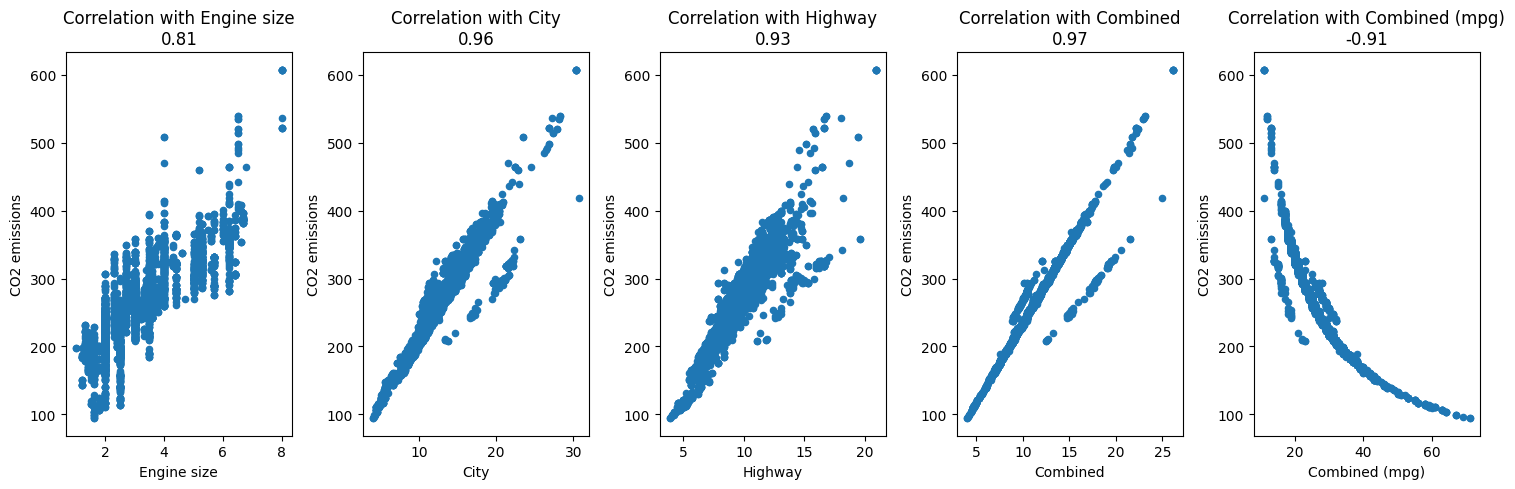

In [36]:
# GRADED CELL: Exercise 3

### START CODE HERE ###

# identify the numeric (independent) feature
numeric_features = [ "Engine size", "City", "Highway", "Combined", "Combined (mpg)"]

# set up the subplots. Use 1 row and as many columns as numeric_features 
scatter_fig, scatter_axes = plt.subplots(1, len(numeric_features), figsize=(15, 5))

# iterate over all the numeric_features index
for k, feature in enumerate(numeric_features):
    # find the correlation between Price and the current feature
    corr = cars["CO2 emissions"].corr(cars[feature])
    
    # create the scatterplot
    cars.plot(kind="scatter", x=feature, y="CO2 emissions",
              ax=scatter_axes[k],
              title="Correlation with "+numeric_features[k]+ 
                                      "\n"+str(round(corr,2)))
    
### END CODE HERE ###
plt.tight_layout()

Remember that "Combined" (and "Combined (mpg)") refer to the combined fuel consumption (55% city, 45% highway)
**Reflect:** 
- Which variables are more correlated to CO₂ emissions?
- If you had to choose only one variable to use and predict the CO₂ emissions of the car, which one would it be?


### Fitting a Simple Linear Regression

Since most of the time the cars will be used in the city, you decide to use the "City" variable for the regression, as it has one of the highest correlations (0.96). Although "Combined" shows a stronger linear relationship with a correlation of 0.97, it’s not as relevant since the cars won’t primarily be used on the highway.


#### Exercise 4: Simple Linear Regression
You are ready to fit your first linear regression! Use the `City` variable as the independent variable, and `CO₂ emissions` as the dependent one.



In [37]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# Prepare predictors. Remember to add a constant term to the predictor
X_simple = sm.add_constant(cars["City"])
# Select the dependant variable
Y_simple = cars["CO2 emissions"]

# Build and fit the model
model_simple = sm.OLS(Y_simple, X_simple).fit()

# Print the model summary
print(model_simple.summary())

### END CODE HERE ###

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.731e+04
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:35:34   Log-Likelihood:                -19341.
No. Observations:                4529   AIC:                         3.869e+04
Df Residuals:                    4527   BIC:                         3.870e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2213      0.963     37.609      0.0

**Reflect**:
- Look at the R-squared value. Do you think you were able to fit a good model?
- Look at the coefficients. Based on the hypothesis test results, is the "City" variable statistically significant?



#### Exercise 5: Plotting the line of best fit

With your model now trained and the coefficients in hand, it’s time to see how well it fits the data. Plot the scatter of "City" vs. "CO2 emissions" again, and overlay the best fit line to visually assess the model's performance. This step will bring your insights to life and give you confidence in your predictions!



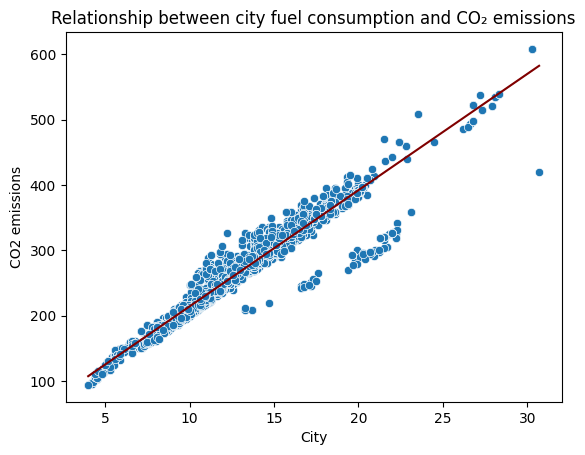

In [44]:
# GRADED CELL: Exercise 5

### START CODE HERE ###

# get intercept and slope
intercept, slope = model_simple.params

# get x-axis values
x_vals = cars["City"].to_numpy()
# generate the y-values for the line of best fit
y_vals = intercept + slope* x_vals

# create the scatter plot
fit_scatterplot = sns.scatterplot(x='City', y='CO2 emissions', data=cars)

# add the line of best fit
sns.lineplot(x=x_vals, y=y_vals, color='maroon')

### END CODE HERE ###
plt.title("Relationship between city fuel consumption and CO₂ emissions")
plt.show()


## Modelling the CO₂ emissions (multiple variables)

The simple linear regression performed well, but you can improve the model by adding other features. This will provide a more comprehensive understanding of how different variables interact, leading to more reliable results to select the best car from your list of options.


### Categorical variables


#### Exercise 6: Encoding categorical variables

Your dataset has some categorical variables that can be useful. "Make", "Vehicle class", and "Transmission" have too many categories, but "Fuel type" has only 4 possible values, which makes it perfect for using dummy variables.


In [46]:
# GRADED CELL: Exercise 6

# copy cars into a new variable
cars_regression = cars.copy()

### START CODE HERE ###

# create the dummy variables. 
fuel_type_dummies = pd.get_dummies(cars_regression["Fuel type"], drop_first=True)

### END CODE HERE ###

# cast the dummy variables as int and add the columns to the cars_regression df
cars_regression[fuel_type_dummies.columns] = fuel_type_dummies.values.astype(int)

### START CODE HERE ### 

# drop the unwanted columns
cars_regression.drop(["Fuel type","Vehicle class", "Make", "Model", "Transmission"], axis=1, inplace=True)

### END CODE HERE ###

cars_regression.head()

,Model year,Engine size,Cylinders,City,Highway,Combined,Combined (mpg),CO2 emissions,E,X,Z
0,2020,2.4,4,9.9,7.0,8.6,33,199,0,0,1
1,2020,3.5,6,12.3,9.2,10.9,26,254,0,0,1
2,2020,3.5,6,12.2,9.5,11.0,26,258,0,0,1
3,2020,3.0,6,9.1,9.0,9.0,31,210,0,0,1
4,2020,3.5,6,11.1,10.8,11.0,26,261,0,0,1



### Training the model


#### Exercise 7: Create and fit a multiple linear regression

Now that you have all your features ready, it is time to create and fit the multiple linear regression model.



In [49]:
# GRADED CELL: Exercise 7

### START CODE HERE ###

# Prepare predictors: drop the CO₂ emissions column
X_multi = cars_regression.drop(["CO2 emissions"], axis=1)
# now add the constant term
X_multi = sm.add_constant(X_multi)

# Select the dependant variable
Y_multi = cars_regression["CO2 emissions"]

# Build and fit the model
model_multi = sm.OLS(Y_multi, X_multi).fit()

# Print the model summary
print(model_multi.summary())

### END CODE HERE ###

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.842e+05
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:58:01   Log-Likelihood:                -10665.
No. Observations:                4529   AIC:                         2.135e+04
Df Residuals:                    4518   BIC:                         2.142e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             67.8119     55.745      1.

Try answering the following questions:
* Did your model improve with respect to the simple linear regression?
* Do all the variables you included have statistical significance? Look at the p-values
* Would you remove any features from your model?

<a id="refining-your-predictors"></a>

### Refining your predictors

The answer to the last question is likely yes. Although the R-squared improved with respect to the simple linear regression, at least two features don't appear statistically significant at any reasonable significance level. You decide to refine the predictors to improve your model. This will help focus your analysis only on variables that genuinely impact CO₂ emissions, ultimately leading to a more accurate and reliable model to help the agency choose the best car that fits the carbon emissions target.

Run the cell below to display a heatmap of the correlation matrix. This will help you spot multicollinearity and identify variables that aren't strongly correlated with the target variable ("CO2 emissions").

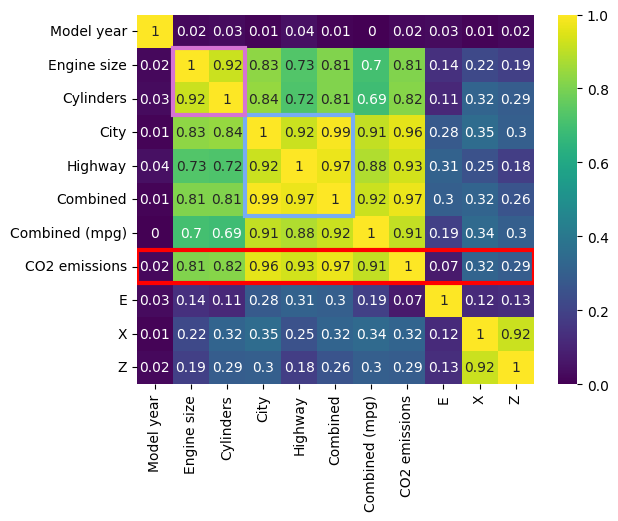

In [50]:
from matplotlib.patches import Rectangle

#compute the correlation matrix
corr = cars_regression.corr()
# plot the heatmap
heatmap = sns.heatmap(corr.abs().round(2), cmap="viridis", annot=True)


# hightlight the row for the target variable
row_target = 7
heatmap.axes.add_patch(Rectangle((0, row_target), width=len(corr.columns), height=1, 
                       edgecolor='red', fill=False, lw=3))
# highlight fuel consumption correlations
fuel_idxs = [3,4,5]
# for col in cols_index:
#     for row in cols_index:
heatmap.axes.add_patch(Rectangle((fuel_idxs[0], fuel_idxs[0]), 
                                 width=len(fuel_idxs), height=len(fuel_idxs), 
                                 edgecolor='#77acf3ff', fill=False, lw=3))
# highlight engine size and cylinders correlation
engine_cyl_idxs = [1,2]
heatmap.axes.add_patch(Rectangle((engine_cyl_idxs[0], engine_cyl_idxs[0]), 
                                 width=len(engine_cyl_idxs), height=len(engine_cyl_idxs), 
                                 edgecolor='#d673d3ff', fill=False, lw=3))

**Reflect:** Interpret the heatmap. If you were to remove two variables, which ones would they be?

<a id="ex8"></a>

#### Exercise 8: Removing features and retraining

Upon reviewing the correlation matrix, it’s clear that "Year" shows no significant correlation with the target variable, making it a strong candidate for removal. Additionally, "Cylinders" and "Engine size" are highly correlated with each other, therefore, it makes sense to retain only one of these features. Finally, considering the fuel consumption variables ("City", "Highway", and "Combined"), these are all highly correlated. By definition, "Combined" should be a linear combination of "City" and "Highway", which is why it’s reasonable to drop it to avoid multicollinearity.



<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To create the dataset for the new model you need to drop columns "Model year", "Cylinders" and "Combined" from the `cars_regression` DataFrame. Remember to pass the column names as a list, and set the `axis` argument (`axis=1` for columns)
- To prepare the predictors, you can use the `sm.add_constant()` function. Remember to remove the "CO2 emissions" column from the predictors
- To get the dependent variable, select the "CO2 emissions" column from the `cars_regression2` DataFrame
- To train the multiple linear regression, use the `sm.OLS()` function
- You can access the summary of the trained model with the `summary()` method
</details>

In [51]:
# GRADED CELL: Exercise 8

### START CODE HERE ###

# create the dataset for the new model 
cars_regression2 = cars_regression.drop(["Model year", "Cylinders", "Combined"], axis=1)

# prepare predictors: drop the CO₂ emissions column
X_multi2 = cars_regression2.drop("CO2 emissions", axis=1)
# add the constant term
X_multi2 = sm.add_constant(X_multi2)

# select the dependant variable
Y_multi2 = cars_regression2["CO2 emissions"]

# build and fit the model
model_multi2 = sm.OLS(Y_multi2, X_multi2).fit()

# print the model summary
print(model_multi2.summary())

### END CODE HERE ###

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.938e+05
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:03:39   Log-Likelihood:                -10736.
No. Observations:                4529   AIC:                         2.149e+04
Df Residuals:                    4521   BIC:                         2.154e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             45.6829      0.783     58.

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<span style="font-size: 10px;">

```mkdn
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO₂ emissions   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.103e+05
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:01:36   Log-Likelihood:                -8607.3
No. Observations:                3623   AIC:                         1.723e+04
Df Residuals:                    3615   BIC:                         1.728e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             46.5887      0.890     52.351      0.000      44.844      48.334
Engine size        0.2459      0.061      4.028      0.000       0.126       0.366
City              12.3722      0.050    248.319      0.000      12.275      12.470
Highway           10.4502      0.054    191.896      0.000      10.343      10.557
Combined (mpg)    -0.1966      0.015    -12.842      0.000      -0.227      -0.167
E               -154.1818      0.479   -321.900      0.000    -155.121    -153.243
X                -34.4755      0.292   -118.230      0.000     -35.047     -33.904
Z                -34.9111      0.293   -119.224      0.000     -35.485     -34.337
==============================================================================
Omnibus:                     2671.842   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           697936.586
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      70.816   Cond. No.                         663.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

</span>
</details>

The model no longer shows the note  `[2] The condition number is large, 2.98e+06. This might indicate that there are strong multicollinearity or other numerical problems.` suggesting that you successfully addressed or reduced the multicollinearity issues.

Interestingly, the R-squared remains at 0.998, meaning the model explains the same variance in CO₂ emissions. However, removing variables with high p-values and multicollinearity improves interpretability, ensures statistically significant predictors, and reduces the risk of overfitting, which R-squared alone cannot measure.

<a id="predicting-co2-emissions"></a>

### Predicting CO₂ emissions for new car models

<a id="ex9"></a>

#### Exercise 9: Predicting CO₂ emissions

Now that you have a model you are satisfied with, you will use it to predict the values of CO₂ emissions of the cars in the shortlist. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Load the test data and process it (this step is already done)</li>
            <li>Use the last model to predict the CO₂ emissions for each of the cars</li>
        </ol>
</div>



In [56]:
# GRADED CELL: Exercise 9

# load the test data
test_cars = pd.read_csv("./data/test_cars.csv")

# prepare the predictors for the first model
# create the dummy variables for "Fuel type"
fuel_type_dummies_test = pd.get_dummies(test_cars["Fuel type"], drop_first=True)
# if not all fuel types are present in the test data, add the missing columns
fuel_type_dummies_test = fuel_type_dummies_test.reindex(
    columns=fuel_type_dummies.columns, fill_value=0)

# cast the dummy variables as int and add the columns to the test_cars df
test_cars[fuel_type_dummies_test.columns] = fuel_type_dummies_test.values.astype(int)

# get the predictor columns from X_multi2. exclude the constant column
X_test_multi2 = test_cars[X_multi2.columns[1:]]
# add the constant column to the test model 
X_test_multi2 = sm.add_constant(X_test_multi2) 

### START CODE HERE ###

# Predict the CO2 emissions using the second model
predictions_test_multi2 = model_multi2.predict(X_test_multi2)

### END CODE HERE ###

In [59]:
test_cars

,Model year,Make,Model,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,City,Highway,Combined,Combined (mpg),E,X,Z
0,2023,Kia,Forte,Compact,2.0,4,AV,X,8.20,6.0,7.2,39.2,0,0,0
1,2024,Nissan,Sentra,Compact,2.0,4,AV,X,7.40,6.1,6.8,41.5,0,0,0
2,2023,Honda,Accord,Mid-size,2.0,4,AV,X,5.53,6.4,5.9,48.0,0,0,0
3,2024,Genesis,G70,Mid-size,2.5,4,A,Z,11.70,8.4,10.2,27.7,0,0,1


In [57]:
print("\nPredictions using the selected regressors model:")
for i in range(len(predictions_test_multi2)):
    print(test_cars["Model year"][i], test_cars["Make"][i], test_cars["Model"][i], ":", round(predictions_test_multi2[i], 2))


Predictions using the selected regressors model:
2023 Kia Forte : 201.41
2024 Nissan Sentra : 255.71
2023 Honda Accord : 257.59
2024 Genesis G70 : 212.81


KeyError: 4

Based on your predictions, which of these new models would you suggest to the agency?